**Modelación Elaborada por Valentin Moreno Vasquez**

# Cirrosis Biliar Primaria (PBC) - Estudio de la Clínica Mayo

## Contexto

La cirrosis es una etapa avanzada de cicatrización (fibrosis) del hígado provocada por diversas enfermedades y condiciones hepáticas, como la hepatitis o el alcoholismo crónico.

Este conjunto de datos proviene de un estudio realizado por la Clínica Mayo entre 1974 y 1984 sobre la **cirrosis biliar primaria (PBC)**. En este estudio se evaluó la eficacia del fármaco **D-penicilamina** mediante un ensayo aleatorizado y controlado con placebo.

- Se incluyeron **424 pacientes** con PBC que cumplían los criterios de elegibilidad.
- Los **primeros 312 pacientes** participaron activamente en el ensayo clínico.
- Los **112 pacientes restantes** no fueron parte del ensayo, pero accedieron a registrar mediciones básicas y a ser seguidos para evaluar su supervivencia.
- 6 casos fueron perdidos durante el seguimiento, por lo que el conjunto final contiene información de **418 pacientes**.

### Referencias
- Fleming y Harrington, *Counting Processes and Survival Analysis*, Wiley, 1991 (Capítulo 0, Sección 0.2).
- Dickson et al., *Hepatology*, Vol. 10, pp. 1–7, 1989.
- Markus et al., *New England Journal of Medicine*, Vol. 320, pp. 1709–1713, 1989.

---

## Diccionario de Datos

| Variable        | Descripción                                                                                      |
|----------------|--------------------------------------------------------------------------------------------------|
| **ID**          | Identificador único del paciente.                                                                |
| **N_Days**      | Número de días entre la inscripción y el evento (muerte, trasplante o fecha de análisis - julio de 1986). |
| **Status**      | Estado del paciente: `C` (Continuing), `CL` (Continuing for liver), `D` (Death).     |
| **Drug**        | Tipo de tratamiento: `D-penicillamine` o `placebo`.                                              |
| **Age**         | Edad del paciente (en días).                                                                     |
| **Sex**         | Sexo biológico: `M` (masculino), `F` (femenino).                                                 |
| **Ascites**     | Presencia de ascitis: `N` (no), `Y` (sí).                                                         |
| **Hepatomegaly**| Presencia de hepatomegalia: `N` (no), `Y` (sí).                                                  |
| **Spiders**     | Presencia de arañas vasculares: `N` (no), `Y` (sí).                                              |
| **Edema**       | Presencia de edema: `N` (sin edema y sin tratamiento), `S` (controlado o leve), `Y` (persistente).|
| **Bilirubin**   | Nivel de bilirrubina sérica (mg/dl).                                                              |
| **Cholesterol** | Nivel de colesterol sérico (mg/dl).                                                               |
| **Albumin**     | Nivel de albúmina (g/dl).                                                                         |
| **Copper**      | Nivel de cobre en orina (μg/día).                                                                 |
| **Alk_Phos**    | Fosfatasa alcalina (U/litro).                                                                     |
| **SGOT**        | SGOT (Transaminasa glutámico oxalacética) (U/ml).                                                 |
| **Triglycerides** | Nivel de triglicéridos (mg/dl).                                                                |
| **Platelets**   | Recuento de plaquetas (x1000 por ml³).                                                            |
| **Prothrombin** | Tiempo de protrombina (segundos).                                                                 |
| **Stage**       | Etapa histológica de la enfermedad: `1`, `2`, `3`, o `4`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [2]:
df= pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
df.shape

(418, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [7]:
df.describe(exclude='number').T

,count,unique,top,freq
Status,418,3,C,232
Drug,312,2,D-penicillamine,158
Sex,418,2,F,374
Ascites,312,2,N,288
Hepatomegaly,312,2,Y,160
Spiders,312,2,N,222
Edema,418,3,N,354


In [8]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

Convertimos edad en dias a años

In [9]:
df['Age']=df['Age']/365.0
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.805479,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.484932,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.120548,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.778082,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.131507,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.046575,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,39.027397,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,57.038356,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,58.041096,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


Aqui se mira que porcentaje hay de valores nulos por columna en donde si es mayor al 50% se haria eliminacion de columnas en este dataset no se presenta el caso.

In [10]:
round(df.isnull().sum()/len(df),3)

ID               0.000
N_Days           0.000
Status           0.000
Drug             0.254
Age              0.000
Sex              0.000
Ascites          0.254
Hepatomegaly     0.254
Spiders          0.254
Edema            0.000
Bilirubin        0.000
Cholesterol      0.321
Albumin          0.000
Copper           0.258
Alk_Phos         0.254
SGOT             0.254
Tryglicerides    0.325
Platelets        0.026
Prothrombin      0.005
Stage            0.014
dtype: float64

Ahora para hacer las imputaciones tomare la moda de los datos categoricos y la mediana de los numericos para esto primero se separa las columnas categoricas de las numericas

In [11]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [12]:
# Moda de categóricas
modas = df[cat_cols].mode().iloc[0]
# Mediana de numéricas
medianas = round(df[num_cols].median(),3)

In [13]:
valores_imputacion = pd.concat([medianas, modas])
valores_imputacion

ID                         209.5
N_Days                    1730.0
Age                       51.036
Bilirubin                    1.4
Cholesterol                309.5
Albumin                     3.53
Copper                      73.0
Alk_Phos                  1259.0
SGOT                       114.7
Tryglicerides              108.0
Platelets                  251.0
Prothrombin                 10.6
Stage                        3.0
Status                         C
Drug             D-penicillamine
Sex                            F
Ascites                        N
Hepatomegaly                   Y
Spiders                        N
Edema                          N
dtype: object

In [14]:
df_imputado= df.fillna(valores_imputacion)
df_imputado.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [15]:
df_imputado.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

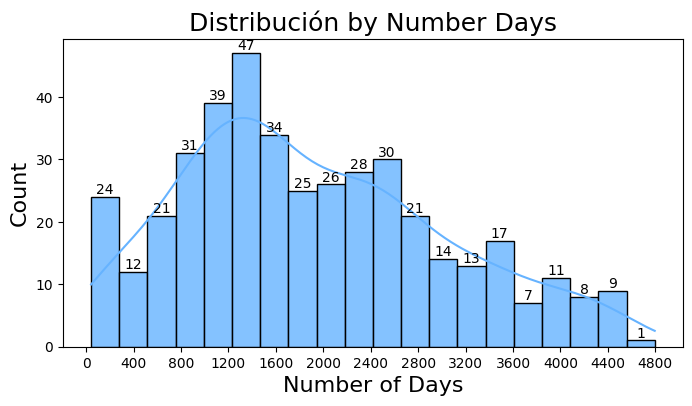

In [16]:
plt.figure(figsize=(8,4))
plt.title('Distribución by Number Days', fontsize=18)
ax = sns.histplot(df_imputado['N_Days'],color='#66B3FF',kde=True, bins=20, alpha=0.8)
plt.xlabel('Number of Days', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)
plt.xticks(ticks=range(0, df_imputado['N_Days'].max() + 400, 400))
plt.show()

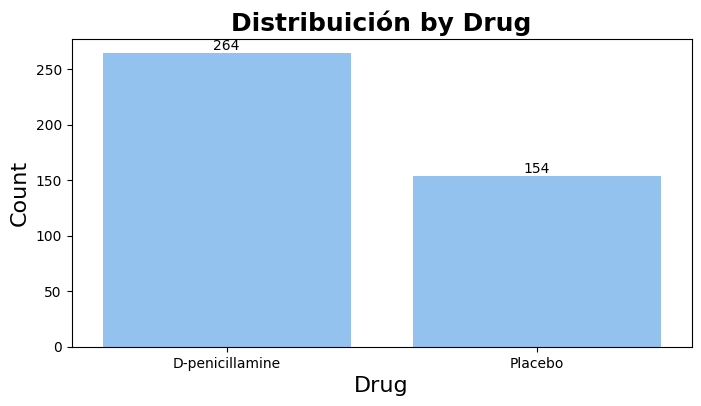

In [17]:
plt.figure(figsize=(8,4))
plt.title('Distribuición by Drug', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df_imputado['Drug'],color='#66B3FF' ,alpha=0.8)
plt.xlabel('Drug', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

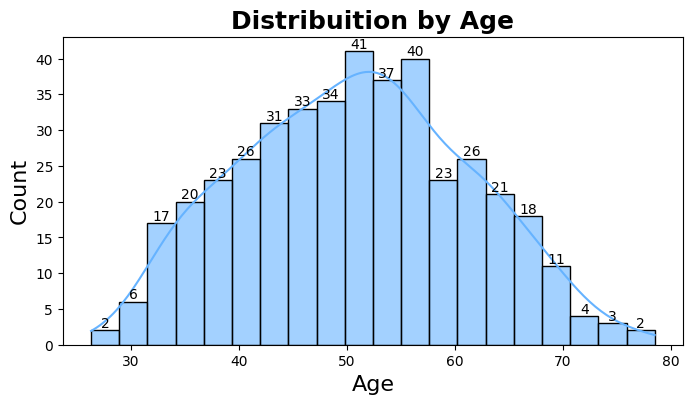

In [18]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Age', fontsize=18, fontweight='bold')
ax = sns.histplot(df_imputado['Age'],color='#66B3FF',kde=True, bins=20, alpha=0.6)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

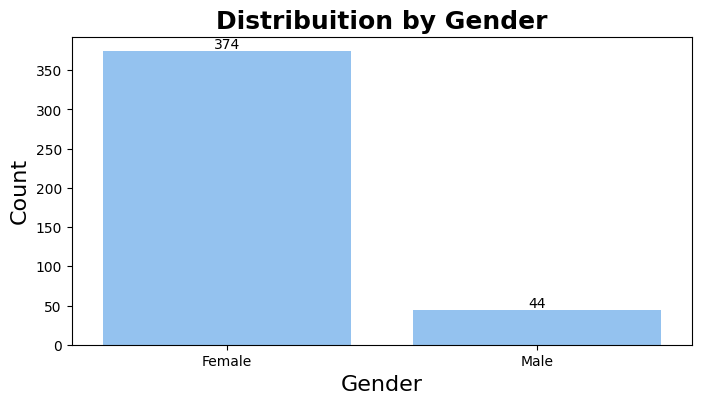

In [19]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Gender', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df_imputado['Sex'], color='#66B3FF', alpha=0.8)
plt.xlabel('Gender', fontsize=16)
plt.xticks(ticks=['F', 'M'], labels=['Female', 'Male'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

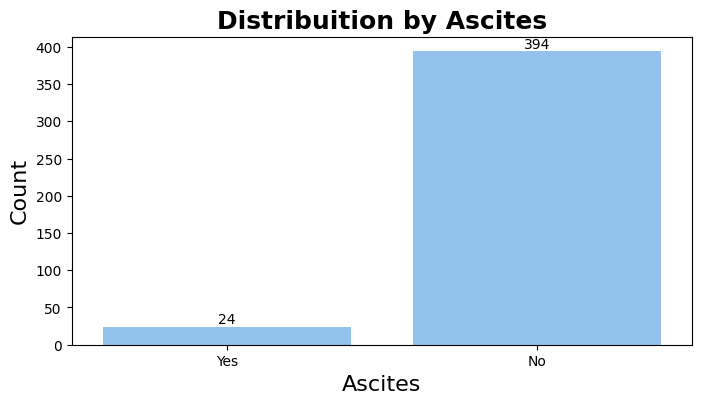

In [20]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Ascites', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df_imputado['Ascites'], color='#66B3FF', alpha=0.8)
plt.xlabel('Ascites', fontsize=16)
plt.xticks(ticks=['N', 'Y'], labels=['No', 'Yes'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

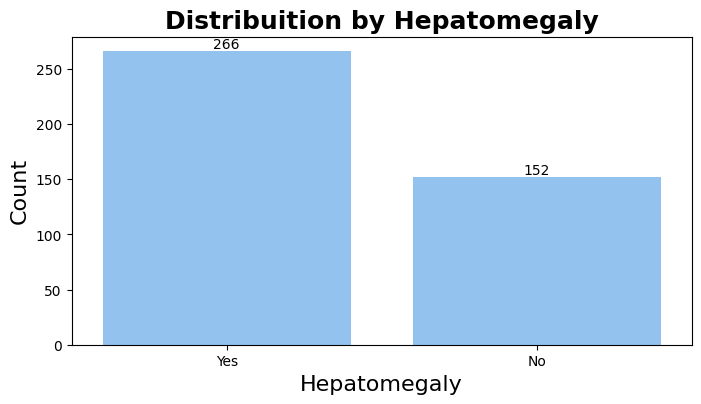

In [21]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Hepatomegaly', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df_imputado['Hepatomegaly'], color='#66B3FF', alpha=0.8)
plt.xlabel('Hepatomegaly', fontsize=16)
plt.xticks(ticks=['N', 'Y'], labels=['No', 'Yes'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

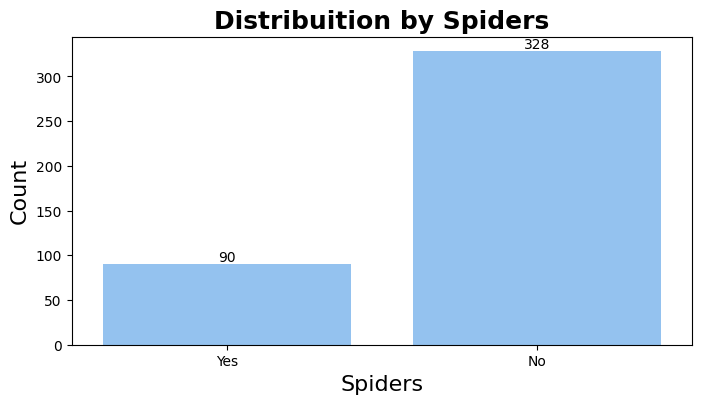

In [22]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Spiders', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df_imputado['Spiders'], color='#66B3FF', alpha=0.8)
plt.xlabel('Spiders', fontsize=16)
plt.xticks(ticks=['N', 'Y'], labels=['No', 'Yes'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

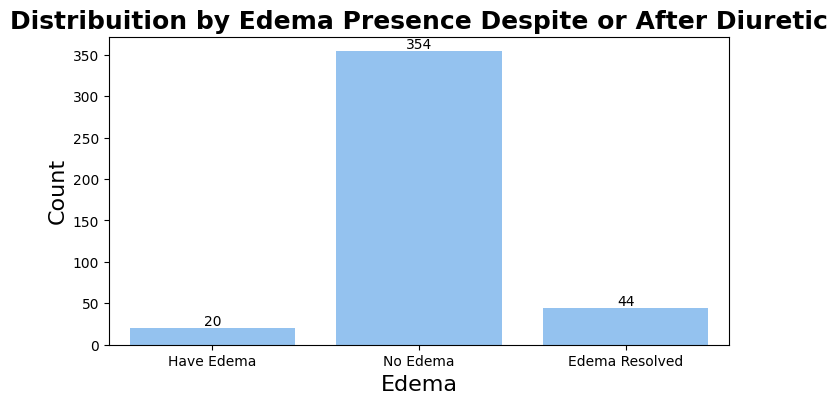

In [23]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Edema Presence Despite or After Diuretic', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df_imputado['Edema'], color='#66B3FF', alpha=0.8)
plt.xlabel('Edema', fontsize=16)
plt.xticks(ticks=['N', 'Y', 'S'], labels=['No Edema', 'Have Edema', 'Edema Resolved'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

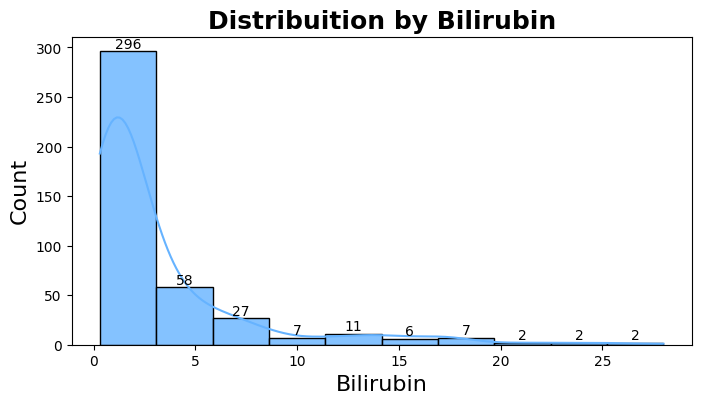

In [24]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Bilirubin', fontsize=18, fontweight='bold')
ax = sns.histplot(x=df_imputado['Bilirubin'], bins=10,kde=True,  color='#66B3FF', alpha=0.8)
plt.xlabel('Bilirubin', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

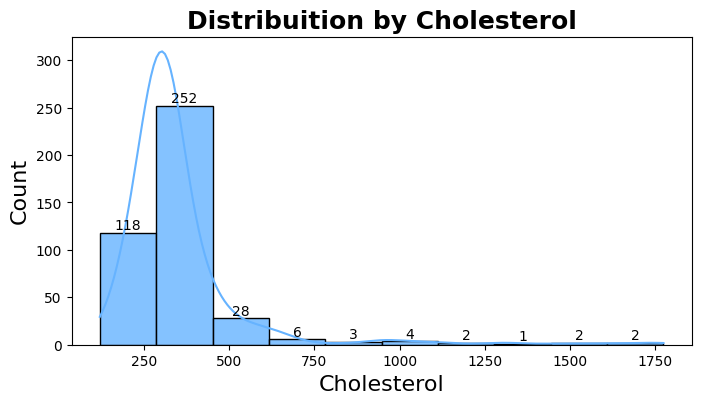

In [25]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Cholesterol', fontsize=18, fontweight='bold')
ax = sns.histplot(x=df_imputado['Cholesterol'], bins=10,kde=True,  color='#66B3FF', alpha=0.8)
plt.xlabel('Cholesterol', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

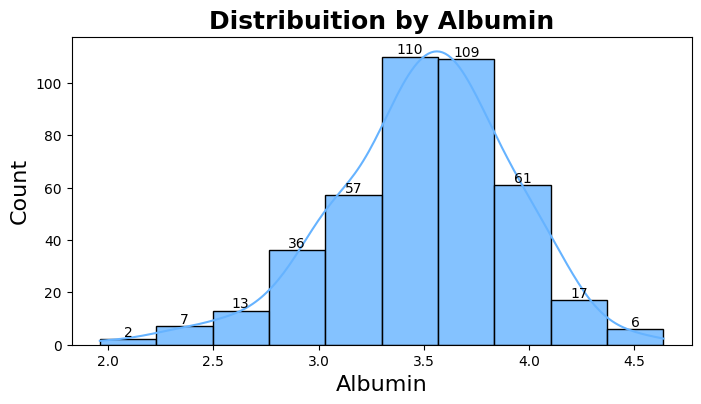

In [26]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Albumin', fontsize=18, fontweight='bold')
ax = sns.histplot(x=df_imputado['Albumin'], bins=10, kde=True, color='#66B3FF', alpha=0.8)
plt.xlabel('Albumin', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

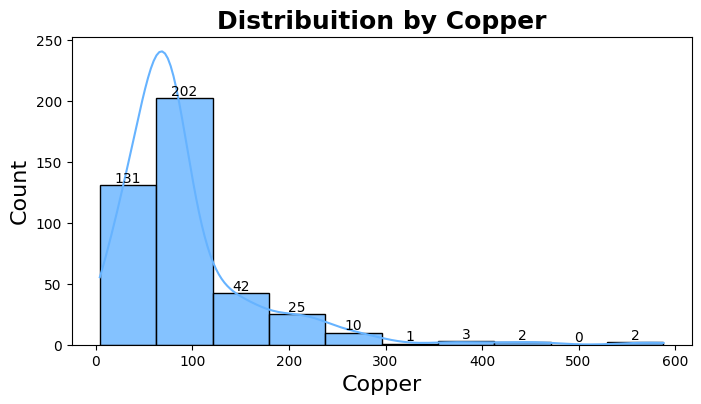

In [27]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Copper', fontsize=18, fontweight='bold')
ax = sns.histplot(x=df_imputado['Copper'], bins=10,kde=True,  color='#66B3FF', alpha=0.8)
plt.xlabel('Copper', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

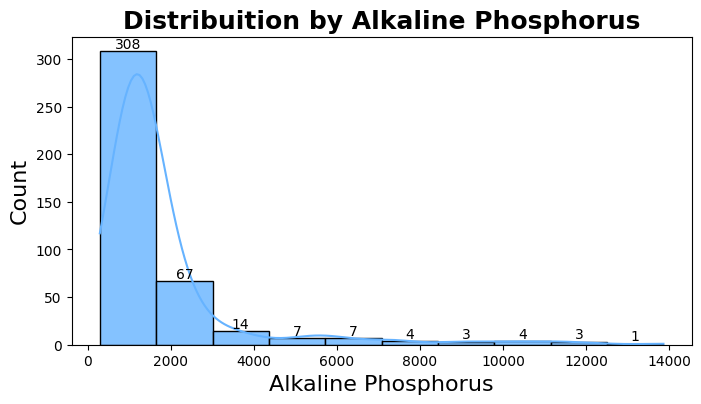

In [28]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Alkaline Phosphorus', fontsize=18, fontweight='bold')
ax = sns.histplot(x=df_imputado['Alk_Phos'], bins=10, kde=True, color='#66B3FF', alpha=0.8)
plt.xlabel('Alkaline Phosphorus', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

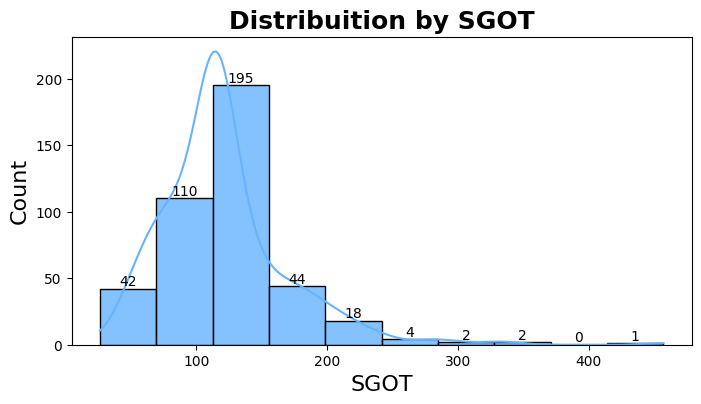

In [29]:
plt.figure(figsize=(8,4))
#Suero Glutámico Oxalacético Transaminasa
plt.title('Distribuition by SGOT', fontsize=18, fontweight='bold')
ax = sns.histplot(x=df_imputado['SGOT'], bins=10, kde=True,  color='#66B3FF', alpha=0.8)
plt.xlabel('SGOT', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

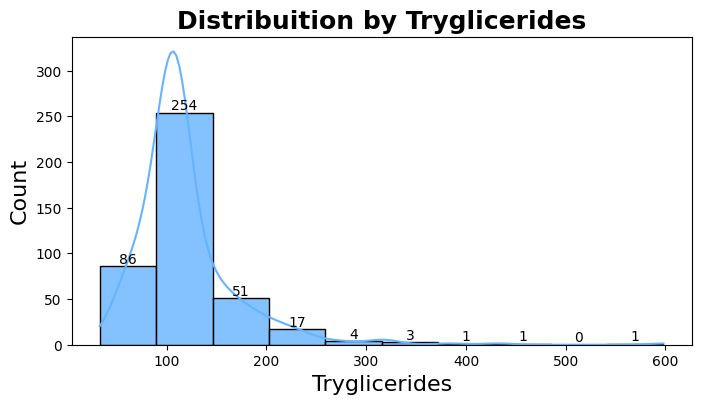

In [30]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Tryglicerides', fontsize=18, fontweight='bold')
ax = sns.histplot(x=df_imputado['Tryglicerides'], bins=10,kde=True,color='#66B3FF', alpha=0.8)
plt.xlabel('Tryglicerides', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

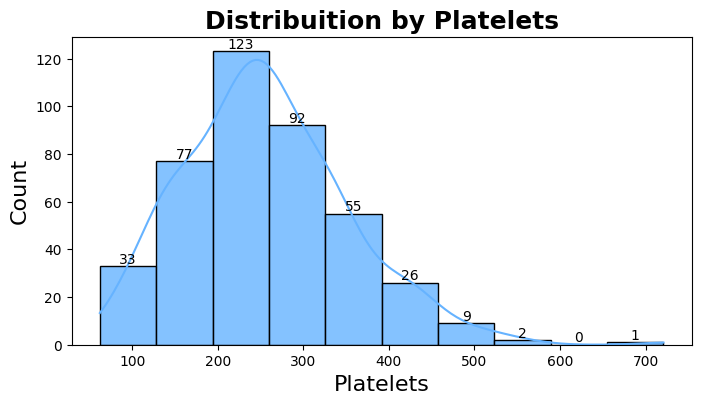

In [31]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Platelets', fontsize=18, fontweight='bold')
ax = sns.histplot(x=df_imputado['Platelets'], bins=10,kde=True,  color='#66B3FF', alpha=0.8)
plt.xlabel('Platelets', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

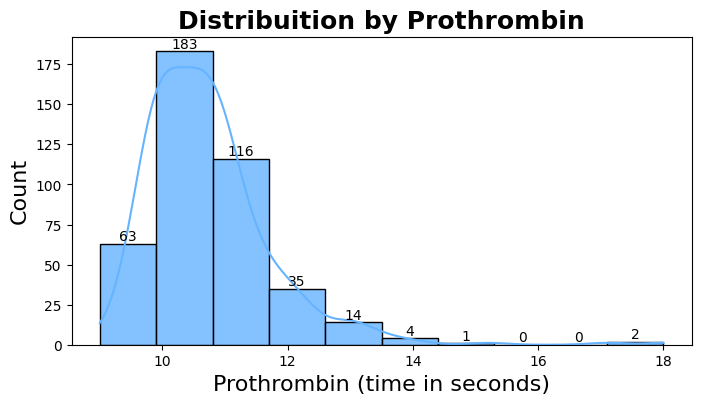

In [32]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Prothrombin', fontsize=18, fontweight='bold')
ax = sns.histplot(x=df_imputado['Prothrombin'], bins=10, kde=True, color='#66B3FF', alpha=0.8)
plt.xlabel('Prothrombin (time in seconds)', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

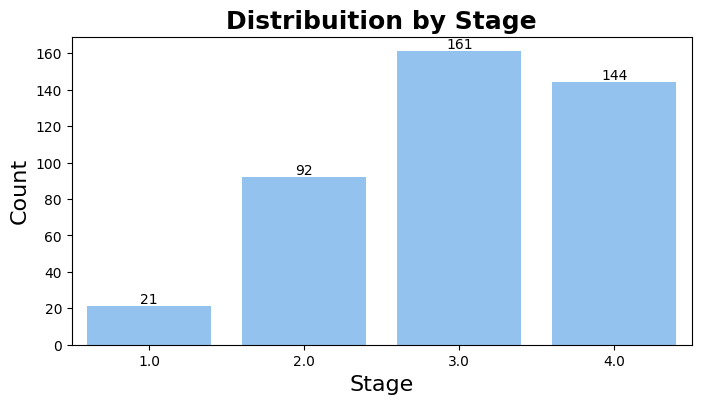

In [33]:
plt.figure(figsize=(8,4))
plt.title('Distribuition by Stage', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df_imputado['Stage'], color='#66B3FF', alpha=0.8)
plt.xlabel('Stage', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

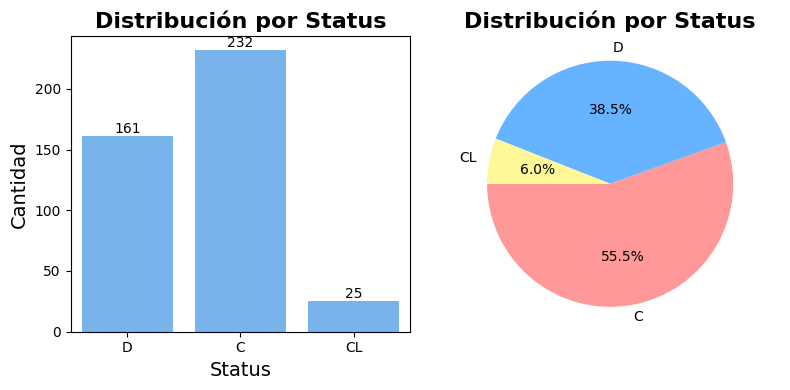

In [34]:
status_counts = df_imputado['Status'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.countplot(ax=axes[0], x=df_imputado['Status'], color='#66B3FF', alpha=1)
axes[0].set_title('Distribución por Status', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Status', fontsize=14)
axes[0].set_ylabel('Cantidad', fontsize=14)
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
            colors=['#FF9999', '#66B3FF', "#FFF899"], startangle=180)
axes[1].set_title('Distribución por Status', fontsize=16, fontweight='bold')
axes[1].axis('equal') 

plt.tight_layout()
plt.show()

como esta en nuestra Y vemos un desbalance muy grande en las clases por lo que ahora se hara un smote para que se entrene bien nuestro modelo

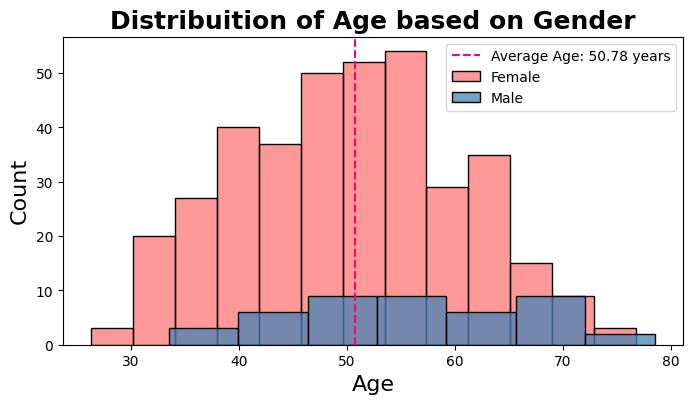

In [35]:
avg_age = np.mean(df_imputado['Age'])

plt.figure(figsize=(8,4))
plt.title('Distribuition of Age based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df_imputado[df_imputado['Sex'] == 'F']['Age'], label='Female', color='red', alpha=0.4)
sns.histplot(df_imputado[df_imputado['Sex'] == 'M']['Age'], label='Male', color='steelblue')
plt.axvline(x=avg_age, color='#ff006e', linestyle='--', label=f'Average Age: {avg_age:.2f} years')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

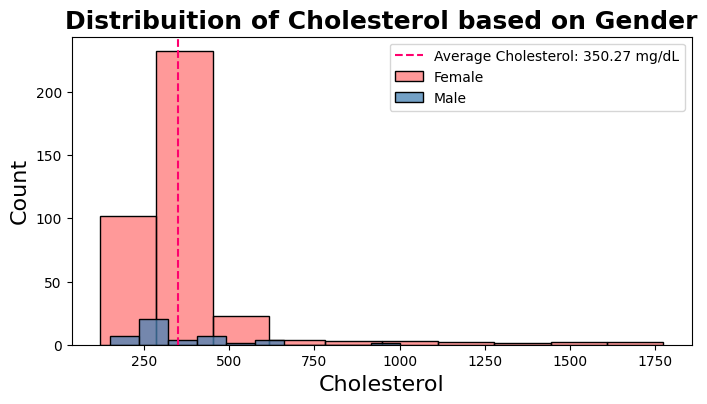

In [36]:
avg_chol = np.mean(df_imputado['Cholesterol'])

plt.figure(figsize=(8,4))
plt.title('Distribuition of Cholesterol based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df_imputado[df_imputado['Sex'] == 'F']['Cholesterol'], bins=10, label='Female', color='red', alpha=0.4)
sns.histplot(df_imputado[df_imputado['Sex'] == 'M']['Cholesterol'], bins=10, label='Male', color='steelblue')
plt.axvline(x=avg_chol, color='#ff006e', linestyle='--', label=f'Average Cholesterol: {avg_chol:.2f} mg/dL')
plt.xlabel('Cholesterol', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

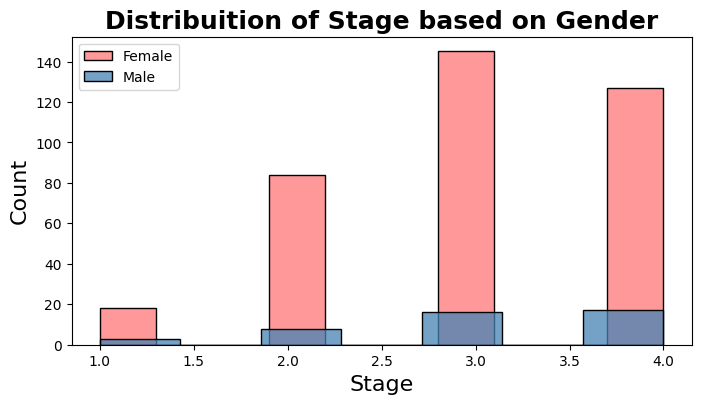

In [37]:
plt.figure(figsize=(8,4))
plt.title('Distribuition of Stage based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df_imputado[df_imputado['Sex'] == 'F']['Stage'], label='Female', color='red', alpha=0.4)
sns.histplot(df_imputado[df_imputado['Sex'] == 'M']['Stage'], label='Male', color='steelblue')
plt.xlabel('Stage', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

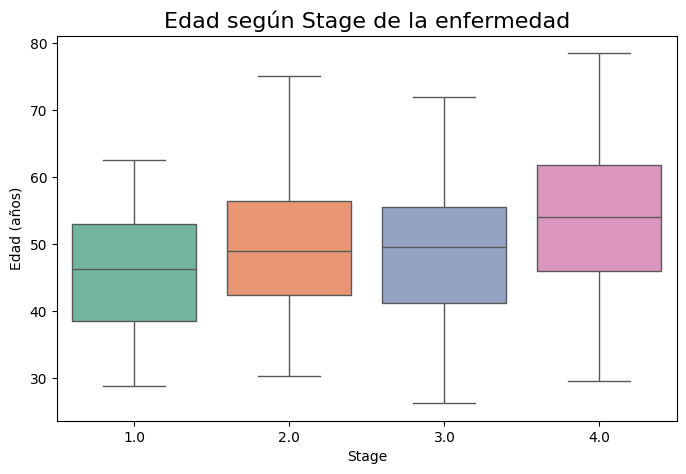

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Stage', y='Age', data=df_imputado, palette='Set2')
plt.title('Edad según Stage de la enfermedad', fontsize=16)
plt.xlabel('Stage')
plt.ylabel('Edad (años)')
plt.show()

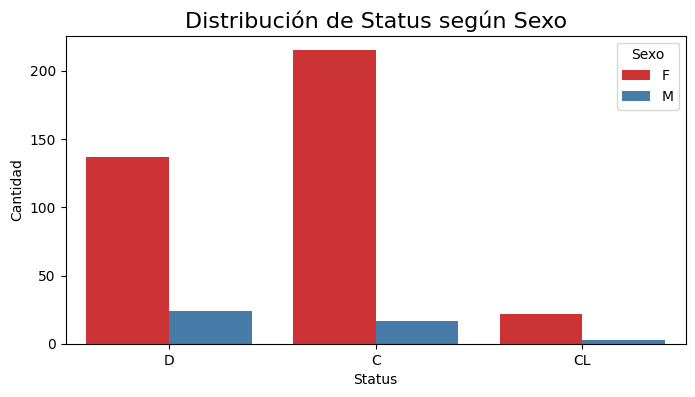

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(x='Status', hue='Sex', data=df_imputado, palette='Set1')
plt.title('Distribución de Status según Sexo', fontsize=16)
plt.xlabel('Status')
plt.ylabel('Cantidad')
plt.legend(title='Sexo')
plt.show()

Este dataset proviene de un estudio clínico real sobre cirrosis primaria biliar (PBC), que fue la enfermedad investigada.

Contexto médico:
PBC (Primary Biliary Cholangitis) es una enfermedad autoinmune que afecta principalmente a mujeres.

Aproximadamente 9 de cada 10 pacientes con PBC son mujeres.

Suele diagnosticarse entre los 40 y 60 años.

Fuente: publicaciones médicas y estudios como Mayo Clinic PBC Study

En resumen:
El desbalance de sexo no es un error del dataset. Refleja una realidad clínica de la enfermedad estudiada:
La Cirrosis Biliar Primaria afecta mayoritariamente a mujeres.

¿Te gustaría que este dato quede documentado en tu análisis exploratorio como una nota explicativa? Te ayudo a redactarlo profesionalmente.

In [40]:
status_dict = {'C': 0, 'CL': 0, 'D': 1}
df_imputado['Status'].replace(status_dict,inplace=True)
df_imputado.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,1,D-penicillamine,58.805479,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,D-penicillamine,56.484932,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,1,D-penicillamine,70.120548,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,1,D-penicillamine,54.778082,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,0,Placebo,38.131507,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [42]:
df_C = df_imputado[df_imputado['Status'] == 0]
df_D = df_imputado[df_imputado['Status'] == 1]

target_size = df_C.shape[0]

df_D_sub = df_D.sample(target_size, replace=True)

df_imputado = pd.concat([df_C, df_D_sub]).reset_index(drop=True)
df_imputado['Status'].value_counts()

Status
0    257
1    257
Name: count, dtype: int64

In [43]:
cat_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dummies = pd.get_dummies(df_imputado[cat_cols], drop_first=True).astype(int)
df_numericas = df_imputado.drop(columns=cat_cols)
df_dummies = pd.concat([df_numericas, dummies], axis=1)
df_dummies.drop(columns=['Status'], inplace=True)
df_dummies.head()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,2,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,0,0,0,1,1,0,0
1,5,1504,38.131507,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1,0,0,1,1,0,0
2,7,1832,55.572603,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0,1,0,0,1,0,0,0
3,13,3577,45.720548,0.7,281.0,3.85,40.0,1181.0,88.35,130.0,244.0,10.6,3.0,1,0,0,0,0,0,0
4,16,3672,40.471233,0.7,204.0,3.66,28.0,685.0,72.85,58.0,198.0,10.8,3.0,1,0,0,0,0,0,0


<Axes: >

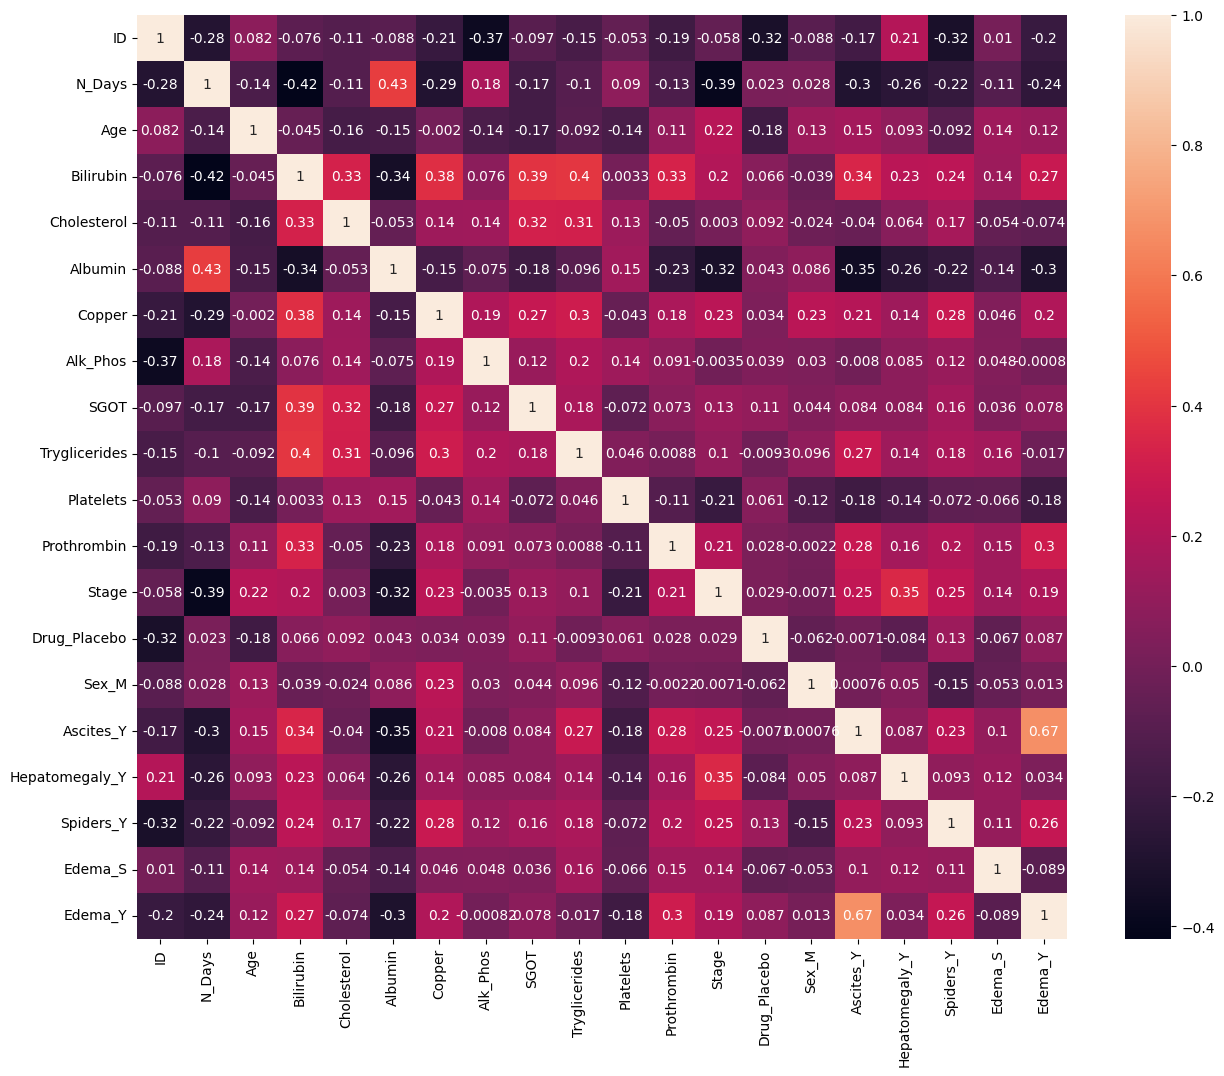

In [44]:
plt.figure(figsize=(15,12))
sns.heatmap(df_dummies.corr(), annot=True)

In [45]:
X = df_dummies
y= df_imputado['Status']

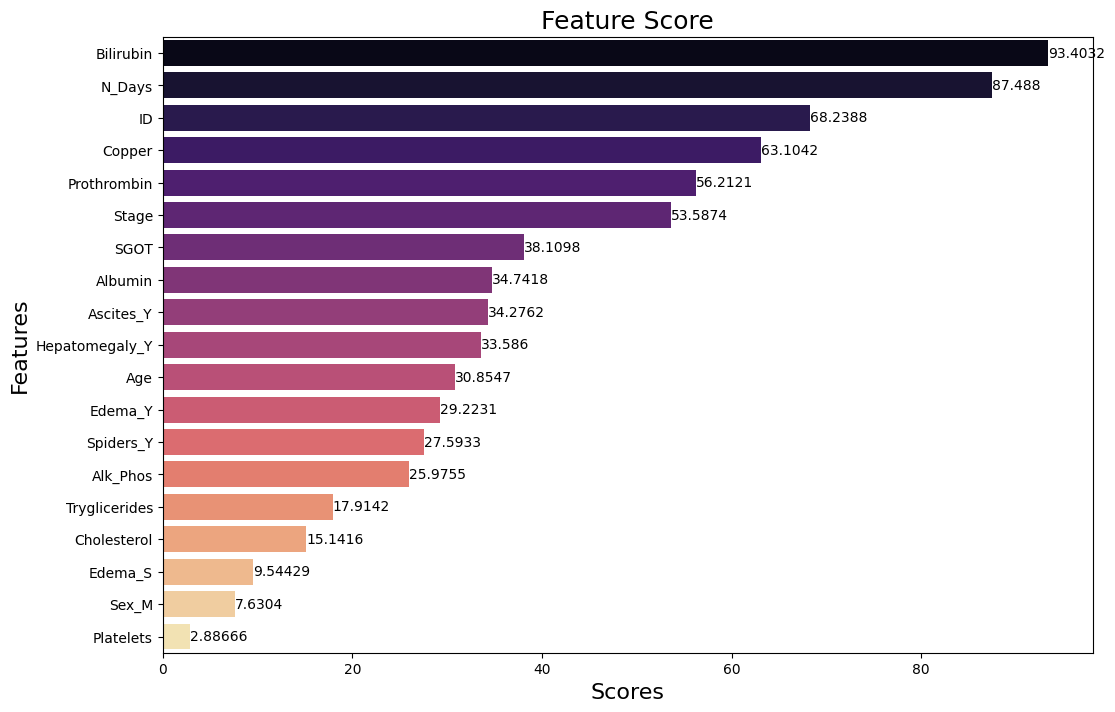

In [46]:
selector = SelectKBest(f_classif, k=19)
X_selected = selector.fit_transform(X,y)

## Creating list of all the columns and their score in variables
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

## Creating a New Dataframe to store features and their scores
feature_score_df = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

## Sort the created dataframe in descending order
feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

## Plot a barplot to for better understanding of the features and scores
plt.figure(figsize=(12,8))
ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')
plt.title('Feature Score', fontsize=18)
plt.xlabel('Scores', fontsize=16)
plt.ylabel('Features', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

In [47]:
X = X.drop(['ID','Sex_M','Platelets','Edema_S','Cholesterol','Tryglicerides'], axis=1)

In [48]:
col = X.columns
sc = StandardScaler()

X[col] = sc.fit_transform(X[col])
X.head()

,N_Days,Age,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Prothrombin,Stage,Drug_Placebo,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_Y
0,2.456459,0.518748,-0.536411,1.513791,-0.567030,2.605700,-0.213583,-0.156268,-0.096612,-0.759399,-0.266145,0.702984,1.754812,-0.248965
1,-0.313904,-1.285601,-0.042259,0.131550,0.560033,-0.610554,-0.220849,0.151085,-0.096612,1.316830,-0.266145,0.702984,1.754812,-0.248965
2,-0.010607,0.429056,-0.557896,1.400492,-0.592357,-0.537368,-1.255769,-1.078326,-0.096612,1.316830,-0.266145,0.702984,-0.569862,-0.248965
3,1.602973,-0.539513,-0.622350,0.856660,-0.744321,-0.366601,-0.707870,-0.156268,-0.096612,1.316830,-0.266145,-1.422508,-0.569862,-0.248965
4,1.690818,-1.055580,-0.622350,0.426126,-0.896284,-0.603857,-1.012259,0.048634,-0.096612,1.316830,-0.266145,-1.422508,-0.569862,-0.248965


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN


In [50]:
knn = KNeighborsClassifier()

params_knn = {
    'n_neighbors':[3,5,7,9,11], 
    'metric':['euclidean', 'chebyshev']}

grid_knn = GridSearchCV(knn, params_knn, cv=6, n_jobs=-1)
grid_knn.fit(X_train, y_train)


GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11]})

In [51]:
best_knn_model = grid_knn.best_estimator_

y_pred_knn = best_knn_model.predict(X_test)
y_pred_train = best_knn_model.predict(X_train)
y_pred_test = best_knn_model.predict(X_test)
print(f'Accuracy Score for {best_knn_model}: ' , accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn)) 


Accuracy Score for KNeighborsClassifier(metric='euclidean', n_neighbors=3):  0.8058252427184466
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        59
           1       0.71      0.91      0.80        44

    accuracy                           0.81       103
   macro avg       0.81      0.82      0.81       103
weighted avg       0.83      0.81      0.81       103



Ajuste de treshold

In [70]:
y_proba_test = best_knn_model.predict_proba(X_test)[:, 1]

threshold = 0.7
y_pred_thresh = (y_proba_test >= threshold).astype(int)

# Nuevo classification report con threshold ajustado
print(f"\nClassification Report (Test) - Custom Threshold ({threshold}):\n")
print(classification_report(y_test, y_pred_thresh))


Classification Report (Test) - Custom Threshold (0.7):

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        59
           1       0.78      0.57      0.66        44

    accuracy                           0.75       103
   macro avg       0.76      0.72      0.73       103
weighted avg       0.75      0.75      0.74       103



In [52]:
print("Classification Report - Training Data")
print(classification_report(y_train, y_pred_train))

Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       198
           1       0.88      0.92      0.90       213

    accuracy                           0.89       411
   macro avg       0.89      0.89      0.89       411
weighted avg       0.89      0.89      0.89       411



In [79]:
y_proba_train_knn = best_knn_model.predict_proba(X_train)[:, 1]
y_proba_test_knn = best_knn_model.predict_proba(X_test)[:, 1]

# ROC AUC Scores
auc_train = roc_auc_score(y_train, y_proba_train_knn)
auc_test = roc_auc_score(y_test, y_proba_test_knn)

print(f"\nROC AUC Score (Train) knn: {auc_train:.4f}")
print(f"ROC AUC Score (Test) knn: {auc_test:.4f}")


ROC AUC Score (Train) knn: 0.9644
ROC AUC Score (Test) knn: 0.8698


In [53]:
def plot_conf_matrix(y_true, y_pred, title):
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()

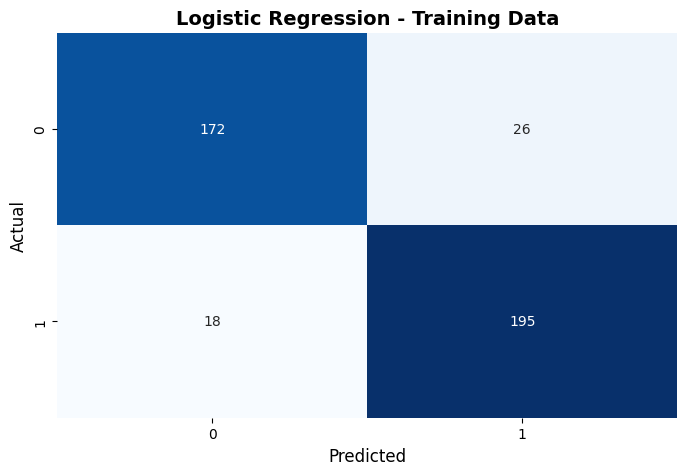

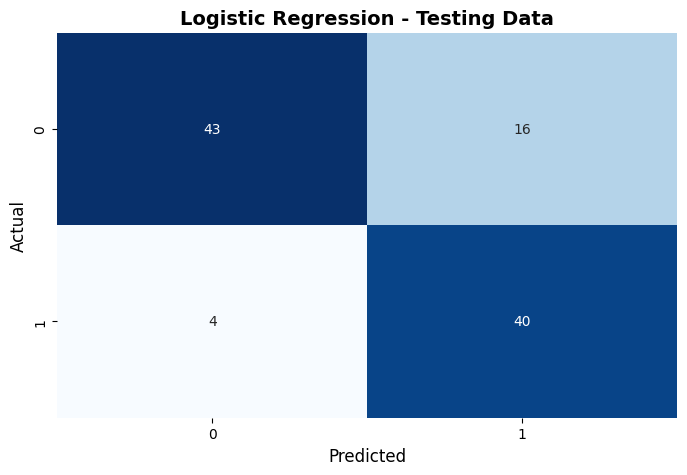

In [54]:
plot_conf_matrix(y_train, y_pred_train, 'Logistic Regression - Training Data')
plot_conf_matrix(y_test, y_pred_test, 'Logistic Regression - Testing Data')

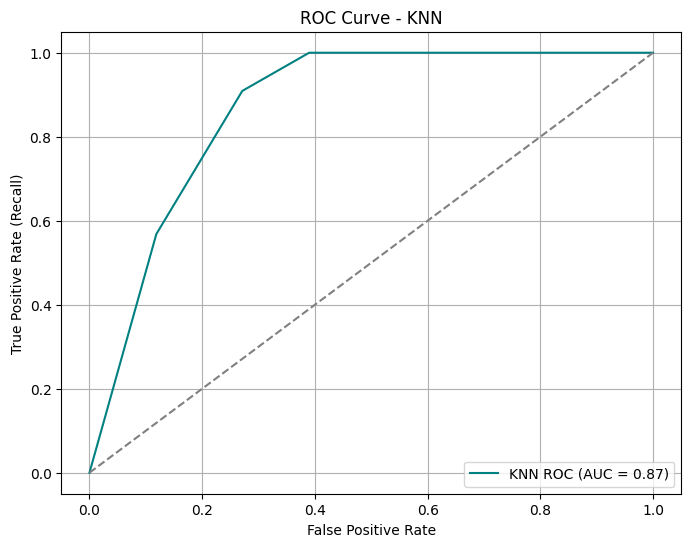

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba_knn = best_knn_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN ROC (AUC = {auc_knn:.2f})", color='teal')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# LR

In [55]:
logreg = LogisticRegression(max_iter=100)

params_logreg = {
    'C': [0.0001,0.1, 1, 10],
    'penalty': ['l2'],
    'class_weight': ['balanced', None],
    'solver': ['lbfgs', 'liblinear'],
}

grid_logreg = GridSearchCV(logreg, params_logreg, cv=5, n_jobs=-1)
grid_logreg.fit(X_train, y_train)
best_logreg_model = grid_logreg.best_estimator_

y_pred_train_logreg = best_logreg_model.predict(X_train)
y_pred_test_logreg = best_logreg_model.predict(X_test)
print(f'Accuracy Score for {best_logreg_model}: ', accuracy_score(y_test, y_pred_test_logreg))
print(classification_report(y_test, y_pred_test_logreg))
print(f'Accuracy Score for Logistic Regression: {accuracy_score(y_test, y_pred_test_logreg):.2f}')
print("Classification Report - Logistic Regression (Test Data)")
print(classification_report(y_test, y_pred_test_logreg))

Accuracy Score for LogisticRegression(C=0.1):  0.8155339805825242
              precision    recall  f1-score   support

           0       0.92      0.75      0.82        59
           1       0.73      0.91      0.81        44

    accuracy                           0.82       103
   macro avg       0.82      0.83      0.82       103
weighted avg       0.84      0.82      0.82       103

Accuracy Score for Logistic Regression: 0.82
Classification Report - Logistic Regression (Test Data)
              precision    recall  f1-score   support

           0       0.92      0.75      0.82        59
           1       0.73      0.91      0.81        44

    accuracy                           0.82       103
   macro avg       0.82      0.83      0.82       103
weighted avg       0.84      0.82      0.82       103



In [82]:
y_proba_train_logreg = best_logreg_model.predict_proba(X_train)[:, 1]
y_proba_test_logreg = best_logreg_model.predict_proba(X_test)[:, 1]

# Calcular AUC
auc_train_logreg = roc_auc_score(y_train, y_proba_train_logreg)
auc_test_logreg = roc_auc_score(y_test, y_proba_test_logreg)

# Mostrar resultados
print(f"\nROC AUC Score (Train) - Logistic Regression: {auc_train_logreg:.4f}")
print(f"ROC AUC Score (Test)  - Logistic Regression: {auc_test_logreg:.4f}")


ROC AUC Score (Train) - Logistic Regression: 0.8891
ROC AUC Score (Test)  - Logistic Regression: 0.9025


In [114]:
y_proba_test = best_logreg_model.predict_proba(X_test)[:, 1]

threshold = 0.9
y_pred_thresh = (y_proba_test >= threshold).astype(int)

# Nuevo classification report con threshold ajustado
print(f"\nClassification Report (Test) - Custom Threshold ({threshold}):\n")
print(classification_report(y_test, y_pred_thresh))


Classification Report (Test) - Custom Threshold (0.9):

              precision    recall  f1-score   support

           0       0.65      0.98      0.78        59
           1       0.93      0.30      0.45        44

    accuracy                           0.69       103
   macro avg       0.79      0.64      0.62       103
weighted avg       0.77      0.69      0.64       103



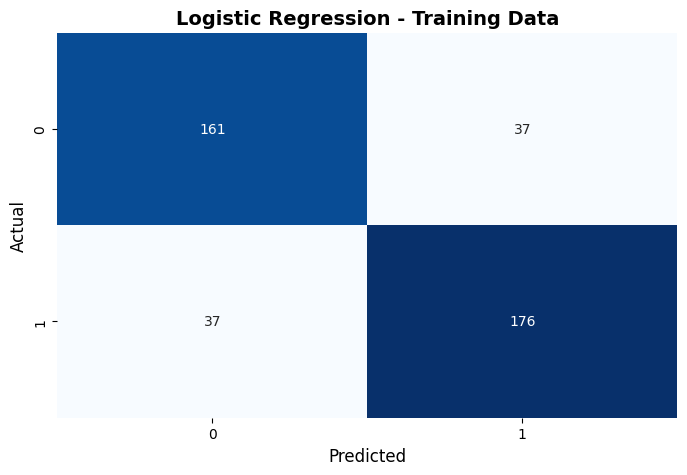

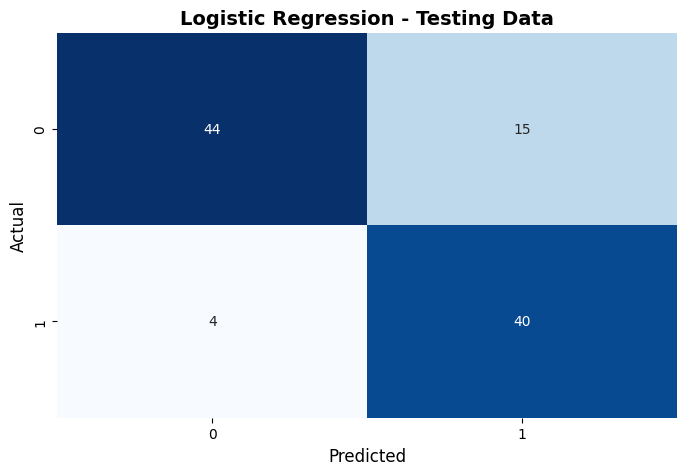

In [56]:
plot_conf_matrix(y_train, y_pred_train_logreg, 'Logistic Regression - Training Data')
plot_conf_matrix(y_test, y_pred_test_logreg, 'Logistic Regression - Testing Data')

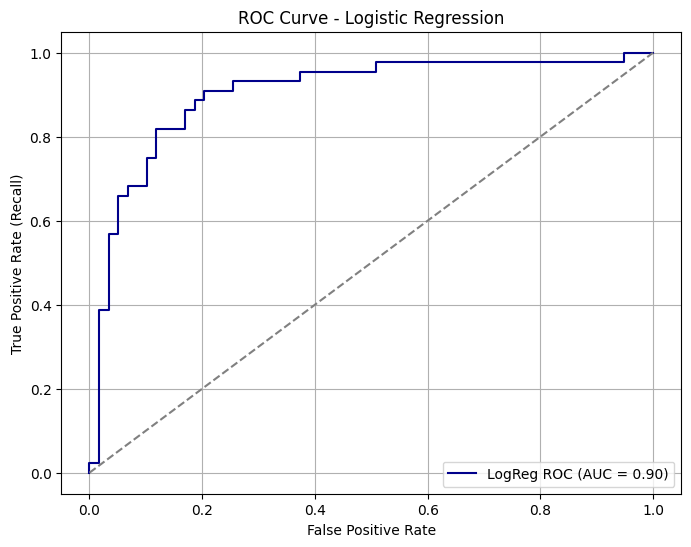

In [80]:
# Obtener las probabilidades de la clase positiva (muertos)
y_proba_logreg = best_logreg_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_proba_logreg)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"LogReg ROC (AUC = {auc_logreg:.2f})", color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea aleatoria
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SVC-SVM

In [83]:
svm = SVC(probability=True)

params_svm = {
    'C': [0.001, 0.1, 1, 10,100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(svm, params_svm, cv=6, n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm_model = grid_svm.best_estimator_

y_pred_train_svm = best_svm_model.predict(X_train)
y_pred_test_svm = best_svm_model.predict(X_test)

print(f'Best SVM Model: {best_svm_model}')
print(f'Accuracy Score for {best_svm_model}: ', accuracy_score(y_test, y_pred_test_svm))
print("Classification Report - SVM (Test Data)")
print(classification_report(y_test, y_pred_test_svm))
print("Classification Report - SVM (Train Data)")
print(classification_report(y_train, y_pred_train_svm))

Best SVM Model: SVC(C=10, gamma='auto', probability=True)
Accuracy Score for SVC(C=10, gamma='auto', probability=True):  0.8155339805825242
Classification Report - SVM (Test Data)
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        59
           1       0.75      0.86      0.80        44

    accuracy                           0.82       103
   macro avg       0.81      0.82      0.81       103
weighted avg       0.83      0.82      0.82       103

Classification Report - SVM (Train Data)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       198
           1       0.96      0.94      0.95       213

    accuracy                           0.95       411
   macro avg       0.95      0.95      0.95       411
weighted avg       0.95      0.95      0.95       411



In [95]:
y_proba_test = best_svm_model.predict_proba(X_test)[:, 1]

threshold = 0.7
y_pred_thresh = (y_proba_test >= threshold).astype(int)

print(f"\nClassification Report (Test) - SVC - Custom Threshold ({threshold}):\n")
print(classification_report(y_test, y_pred_thresh))


Classification Report (Test) - SVC - Custom Threshold (0.7):

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        59
           1       0.92      0.82      0.87        44

    accuracy                           0.89       103
   macro avg       0.90      0.88      0.89       103
weighted avg       0.90      0.89      0.89       103



In [105]:
y_proba_train_svc = best_svm_model.predict_proba(X_train)[:, 1]
y_proba_test_svc = best_svm_model.predict_proba(X_test)[:, 1]

auc_train_svc = roc_auc_score(y_train, y_proba_train_svc)
auc_test_svc = roc_auc_score(y_test, y_proba_test_svc)

print(f"\nROC AUC Score (Train) - SVC: {auc_train_svc:.4f}")
print(f"ROC AUC Score (Test)  - SVC: {auc_test_svc:.4f}")


ROC AUC Score (Train) - SVC: 0.9800
ROC AUC Score (Test)  - SVC: 0.9299


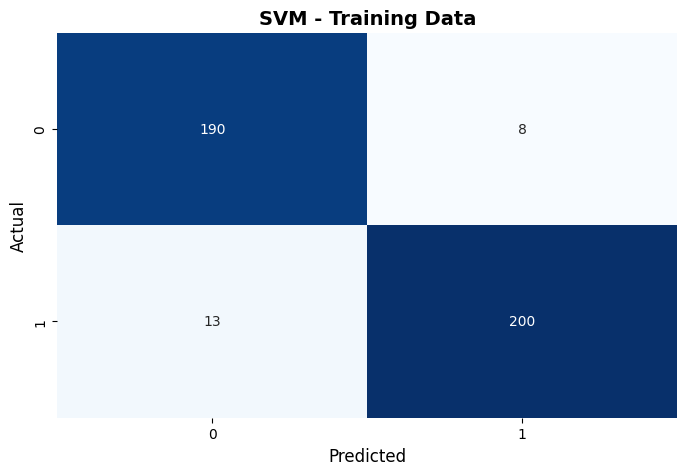

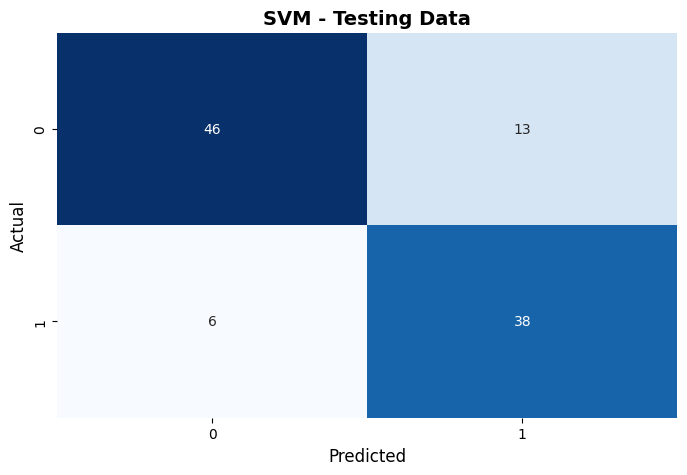

In [84]:
plot_conf_matrix(y_train, y_pred_train_svm, 'SVM - Training Data')
plot_conf_matrix(y_test, y_pred_test_svm, 'SVM - Testing Data')

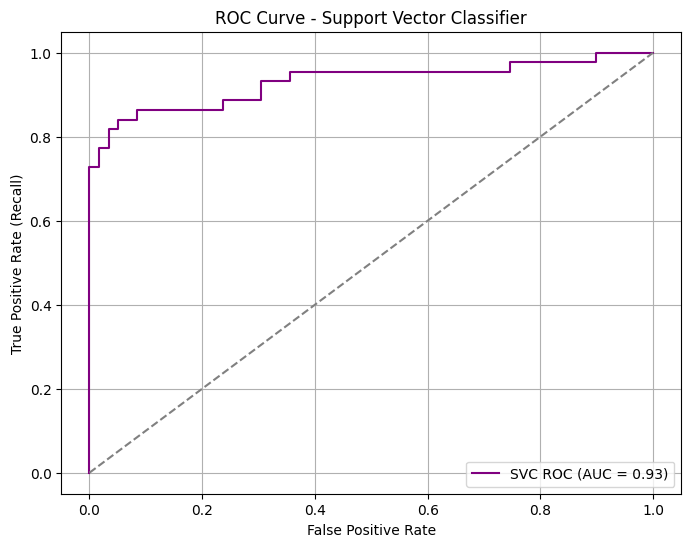

In [85]:
y_proba_svc = best_svm_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_proba_svc)
auc_svc = roc_auc_score(y_test, y_proba_svc)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f"SVC ROC (AUC = {auc_svc:.2f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Support Vector Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

params_tree = {
    'max_depth': [5, 10],
    'min_samples_split': [ 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(tree, params_tree, cv=6, n_jobs=-1)
grid_tree.fit(X_train, y_train)
best_tree_model = grid_tree.best_estimator_

y_pred_train_tree = best_tree_model.predict(X_train)
y_pred_test_tree = best_tree_model.predict(X_test)

print(f'Best Decision Tree Model: {best_tree_model}')
print(f'Accuracy Score for Decision Tree: {accuracy_score(y_test, y_pred_test_tree):.2f}')
print("Classification Report - Decision Tree (Test Data)")
print(classification_report(y_test, y_pred_test_tree))
print("Classification Report - Decision Tree (Train Data)")
print(classification_report(y_train, y_pred_train_tree))

Best Decision Tree Model: DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
Accuracy Score for Decision Tree: 0.80
Classification Report - Decision Tree (Test Data)
              precision    recall  f1-score   support

           0       0.90      0.73      0.80        59
           1       0.71      0.89      0.79        44

    accuracy                           0.80       103
   macro avg       0.80      0.81      0.80       103
weighted avg       0.82      0.80      0.80       103

Classification Report - Decision Tree (Train Data)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       1.00      0.99      1.00       213

    accuracy                           1.00       411
   macro avg       0.99      1.00      1.00       411
weighted avg       1.00      1.00      1.00       411



In [118]:
y_proba_test = best_tree_model.predict_proba(X_test)[:, 1]

threshold = 0.2
y_pred_thresh = (y_proba_test >= threshold).astype(int)

print(f"\nClassification Report (Test) - Decision Tree - Custom Threshold ({threshold}):\n")
print(classification_report(y_test, y_pred_thresh))


Classification Report (Test) - Decision Tree - Custom Threshold (0.2):

              precision    recall  f1-score   support

           0       0.89      0.69      0.78        59
           1       0.68      0.89      0.77        44

    accuracy                           0.78       103
   macro avg       0.79      0.79      0.78       103
weighted avg       0.80      0.78      0.78       103



In [106]:
y_proba_train_tree = best_tree_model.predict_proba(X_train)[:, 1]
y_proba_test_tree = best_tree_model.predict_proba(X_test)[:, 1]

auc_train_tree = roc_auc_score(y_train, y_proba_train_tree)
auc_test_tree = roc_auc_score(y_test, y_proba_test_tree)

print(f"\nROC AUC Score (Train) - Decision Tree: {auc_train_tree:.4f}")
print(f"ROC AUC Score (Test)  - Decision Tree: {auc_test_tree:.4f}")


ROC AUC Score (Train) - Decision Tree: 1.0000
ROC AUC Score (Test)  - Decision Tree: 0.8057


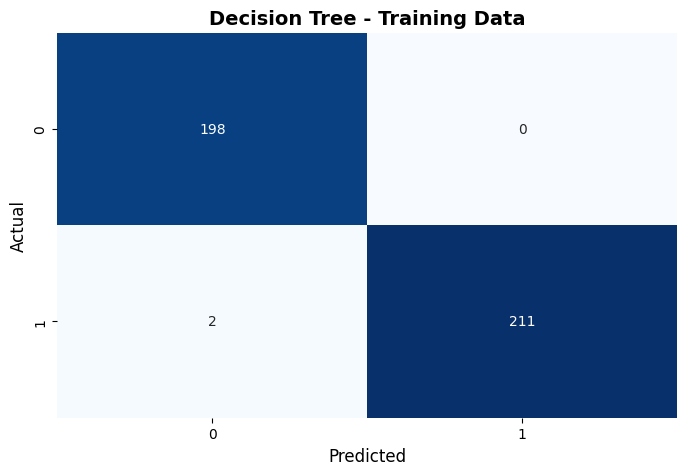

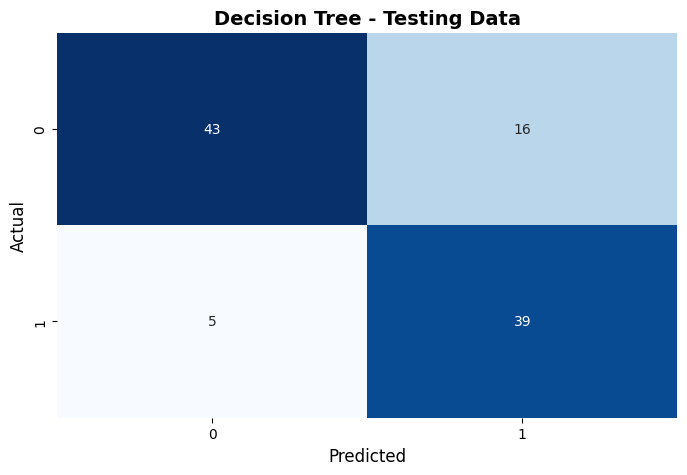

In [60]:
plot_conf_matrix(y_train, y_pred_train_tree, 'Decision Tree - Training Data')
plot_conf_matrix(y_test, y_pred_test_tree, 'Decision Tree - Testing Data')

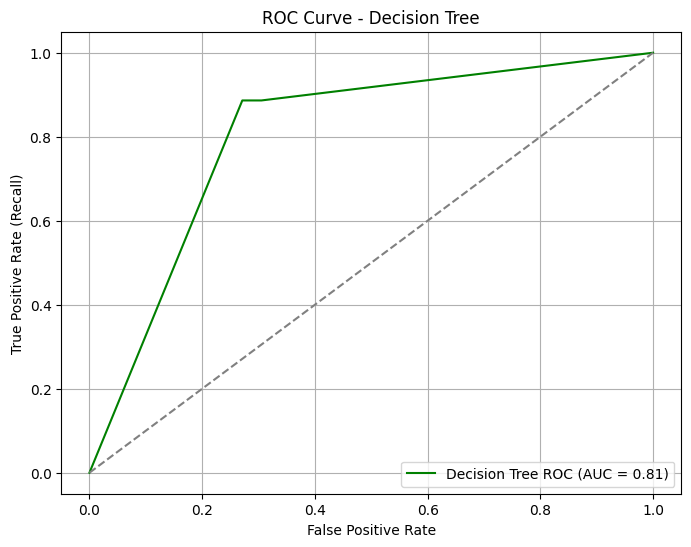

In [91]:
y_proba_tree = best_tree_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
auc_tree = roc_auc_score(y_test, y_proba_tree)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree ROC (AUC = {auc_tree:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# XGB

In [87]:
import xgboost as xgb

In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(random_state=42)

params_xgb = {
    'max_depth': [1,2, 3],             
    'n_estimators': [30, 50],       
    'learning_rate': [0.05, 0.1],    
    'subsample': [0.8, 0.9]           
}

grid_xgb = GridSearchCV(estimator=xgb,param_grid=params_xgb,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)
grid_xgb.fit(X_train, y_train)
best_xgb_model = grid_xgb.best_estimator_

y_pred_train_xgb = best_xgb_model.predict(X_train)
y_pred_test_xgb = best_xgb_model.predict(X_test)

print(f'\nBest Parameters: {grid_xgb.best_params_}\n')
print(f'Accuracy Score for XGBoost (Train): {accuracy_score(y_train, y_pred_train_xgb):.4f}')
print(f'Accuracy Score for XGBoost (Test): {accuracy_score(y_test, y_pred_test_xgb):.4f}')
print("\nClassification Report - XGBoost (Test Data)")
print(classification_report(y_test, y_pred_test_xgb))
print(classification_report(y_train, y_pred_train_xgb))

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}

Accuracy Score for XGBoost (Train): 0.9489
Accuracy Score for XGBoost (Test): 0.8738

Classification Report - XGBoost (Test Data)
              precision    recall  f1-score   support

           0       0.93      0.85      0.88        59
           1       0.82      0.91      0.86        44

    accuracy                           0.87       103
   macro avg       0.87      0.88      0.87       103
weighted avg       0.88      0.87      0.87       103

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       198
           1       0.94      0.96      0.95       213

    accuracy                           0.95       411
   macro avg       0.95      0.95      0.95       411
weighted avg       0.95      0.95      0.95       411



In [104]:
y_proba_test = best_xgb_model.predict_proba(X_test)[:, 1]

threshold = 0.7
y_pred_thresh = (y_proba_test >= threshold).astype(int)

print(f"\nClassification Report (Test) - XGBoost - Custom Threshold ({threshold}):\n")
print(classification_report(y_test, y_pred_thresh))


Classification Report (Test) - XGBoost - Custom Threshold (0.7):

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        59
           1       0.92      0.75      0.82        44

    accuracy                           0.86       103
   macro avg       0.88      0.85      0.86       103
weighted avg       0.87      0.86      0.86       103



In [107]:
y_proba_train_xgb = best_xgb_model.predict_proba(X_train)[:, 1]
y_proba_test_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

auc_train_xgb = roc_auc_score(y_train, y_proba_train_xgb)
auc_test_xgb = roc_auc_score(y_test, y_proba_test_xgb)

print(f"\nROC AUC Score (Train) - XGBoost: {auc_train_xgb:.4f}")
print(f"ROC AUC Score (Test)  - XGBoost: {auc_test_xgb:.4f}")


ROC AUC Score (Train) - XGBoost: 0.9900
ROC AUC Score (Test)  - XGBoost: 0.9407


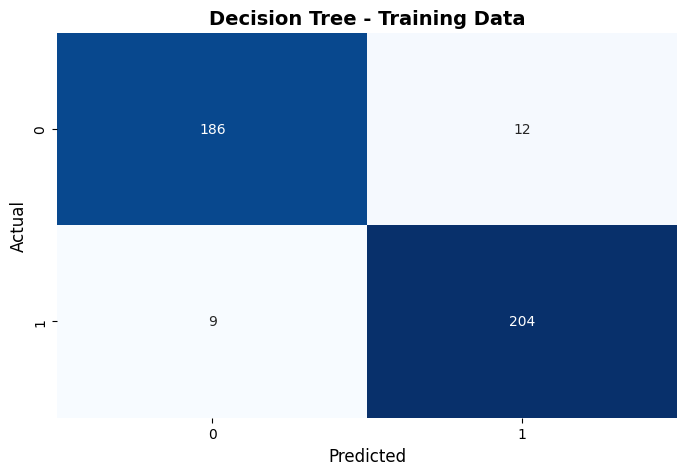

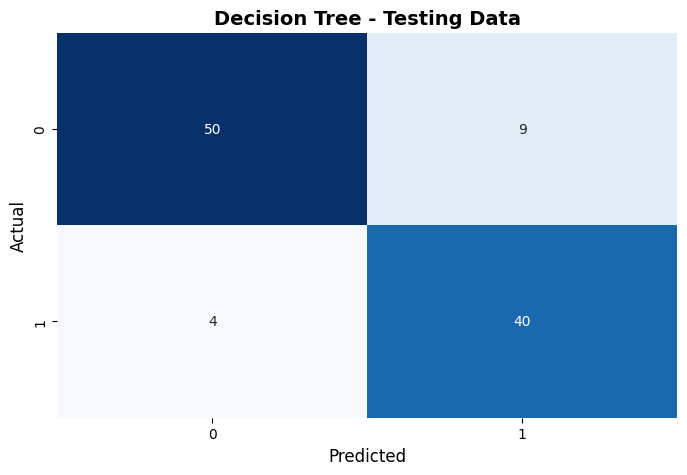

In [89]:
plot_conf_matrix(y_train, y_pred_train_xgb, 'Decision Tree - Training Data')
plot_conf_matrix(y_test, y_pred_test_xgb, 'Decision Tree - Testing Data')

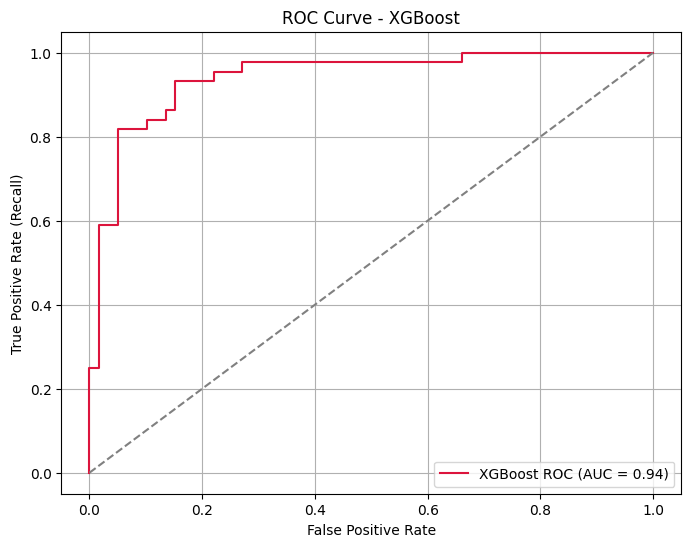

In [92]:
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost ROC (AUC = {auc_xgb:.2f})", color='crimson')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [125]:
from sklearn.metrics import accuracy_score, recall_score

models = {
    "DecisionTreeClassifier": best_tree_model,
    "XGBoost": best_xgb_model,
    "KNN": best_knn_model,
    "Logistic Regression": best_logreg_model,
    "SVC": best_svm_model
}

# Crear tabla
metricas = []

for nombre, modelo in models.items():
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_proba)

    metricas.append([nombre, acc, recall_1, auc])

# Mostrar tabla
df_resultados = pd.DataFrame(metricas, columns=["Modelo", "Accuracy", "Recall (Clase 1)", "ROC AUC"])
print(df_resultados)

                   Modelo  Accuracy  Recall (Clase 1)   ROC AUC
0  DecisionTreeClassifier  0.796117          0.886364  0.805663
1                 XGBoost  0.873786          0.909091  0.940678
2                     KNN  0.805825          0.909091  0.869800
3     Logistic Regression  0.815534          0.909091  0.902542
4                     SVC  0.815534          0.863636  0.929892


Conclusiones 

- los modelos tienden a tener recall buenos pero para las condiciones que se buscaban pero se ve una gran diferencia en la condicion minoritaria que se tuvo oversampling por el tamaño tan considerablemente pequeño.

- Considero que con una data mas grande para este estudio se puede no solo obtener la condicion en la que se encuentra la persona sino la etapa en la que esta de la enfermedad.

- con los ajustes de los treshold llegue a algo bueno para las condiciones porque subi el recall de 0 (vivir) a los maximos ya que es mejor que se diga que va morir cuando no asi a que le digana uno que va a vivir cuando no lo es.

- Por sus metricas XGboost es el mejor modelo para este problema.